# Advanced Machine Learning
## MSc Data Science - Faculty of Lisbon
### nov 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

#### 1. Exploratory  data  analysis 

In [2]:
df_train = pd.read_csv('./Data/cardiovascular_train.csv')
df_train.head()

,Age,Anxiety,BodyMassIndex,Depression,Diabetes,EducationLevel,Hypercholesterolemia,Hypertension,PhysicalActivity,Sex,SleepDuration,SmokerProfile,SocioeconomicStatus
0,54-64,No,Overweight,No,No,2,No,No,Regularly Active,Male,6-9hours,Smoker,3
1,24-34,No,Obese,No,No,3,Yes,No,Regularly Active,Female,6-9hours,Non_Smoker,3
2,24-34,No,Overweight,No,No,2,No,No,Insufficiently Active,Male,6-9hours,Non_Smoker,1
3,34-44,No,Overweight,No,No,2,Yes,Yes,Regularly Active,Male,<6hours,Non_Smoker,3
4,44-54,No,Overweight,No,Yes,2,No,Yes,Regularly Active,Female,6-9hours,Smoker,3


In [3]:
age_dtype = CategoricalDtype(categories=['18-24', '24-34', '34-44', '44-54', '54-64', '64-74'], ordered=True)
bmi_dtype = CategoricalDtype(categories=['Underweight', 'Normal', 'Overweight', 'Obese'], ordered=True)
sleep_dtype = CategoricalDtype(categories=['<6hours', '6-9hours', '>9hours'], ordered=True)
smoker_dtype = CategoricalDtype(categories=['Non_Smoker', 'Ex_Smoker', 'Smoker'], ordered=True)

df_train['Age'] = df_train['Age'].astype(age_dtype)
df_train['BodyMassIndex'] = df_train['BodyMassIndex'].astype(bmi_dtype)
df_train['SleepDuration'] = df_train['SleepDuration'].astype(sleep_dtype)
df_train['SmokerProfile'] = df_train['SmokerProfile'].astype(smoker_dtype)

In [4]:
for column in df_train.columns:
    print(df_train[column].value_counts())

Age
34-44    1411
44-54    1148
24-34     655
54-64     594
18-24      28
64-74       9
Name: count, dtype: int64
Anxiety
No     3454
Yes     391
Name: count, dtype: int64
BodyMassIndex
Overweight     1440
Normal         1344
Obese           968
Underweight      93
Name: count, dtype: int64
Depression
No     3824
Yes      21
Name: count, dtype: int64
Diabetes
No     3669
Yes     176
Name: count, dtype: int64
EducationLevel
2    2914
3     926
1       5
Name: count, dtype: int64
Hypercholesterolemia
No     2351
Yes    1494
Name: count, dtype: int64
Hypertension
No     3107
Yes     738
Name: count, dtype: int64
PhysicalActivity
Insufficiently Active    2770
Regularly Active         1075
Name: count, dtype: int64
Sex
Male      2618
Female    1227
Name: count, dtype: int64
SleepDuration
6-9hours    3440
<6hours      401
>9hours        4
Name: count, dtype: int64
SmokerProfile
Non_Smoker    2175
Smoker        1038
Ex_Smoker      632
Name: count, dtype: int64
SocioeconomicStatus
3    1405
2 

In [24]:
multi_cols = ['Age', 'BodyMassIndex', 'EducationLevel', 'SleepDuration', 'SmokerProfile', 'SocioeconomicStatus']
binary_cols = ['Anxiety','Depression', 'Diabetes', 'Hypercholesterolemia', 'Hypertension', 'PhysicalActivity', 'Sex']

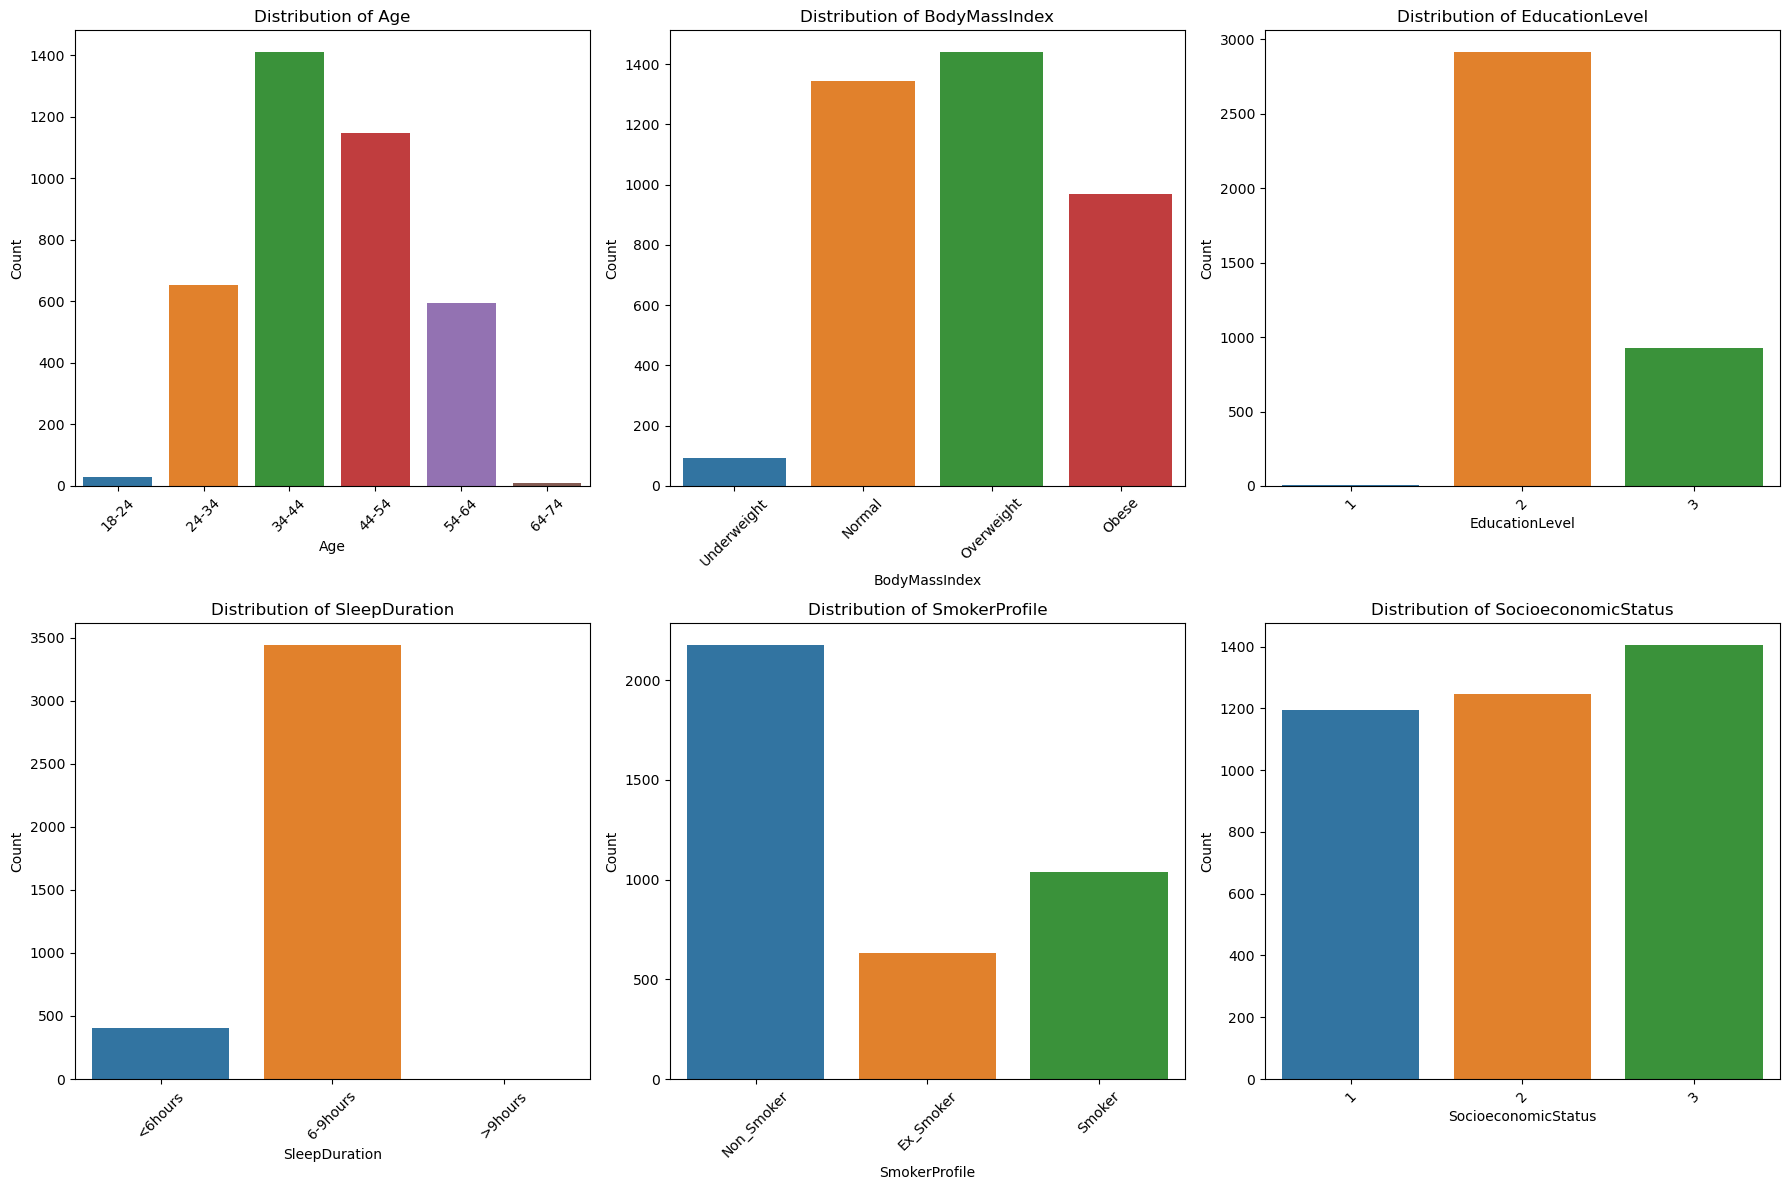

In [22]:
import math

# Assuming `multi_cols` is your list of columns
num_cols = len(multi_cols)
cols_per_row = 3  # Number of plots per row
num_rows = math.ceil(num_cols / cols_per_row)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, 6 * num_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easier indexing

for idx, col in enumerate(multi_cols):
    sns.countplot(x=col, hue=col, data=df_train, palette="tab10", ax=axes[idx], legend=False)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of columns is not a multiple of 3
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()

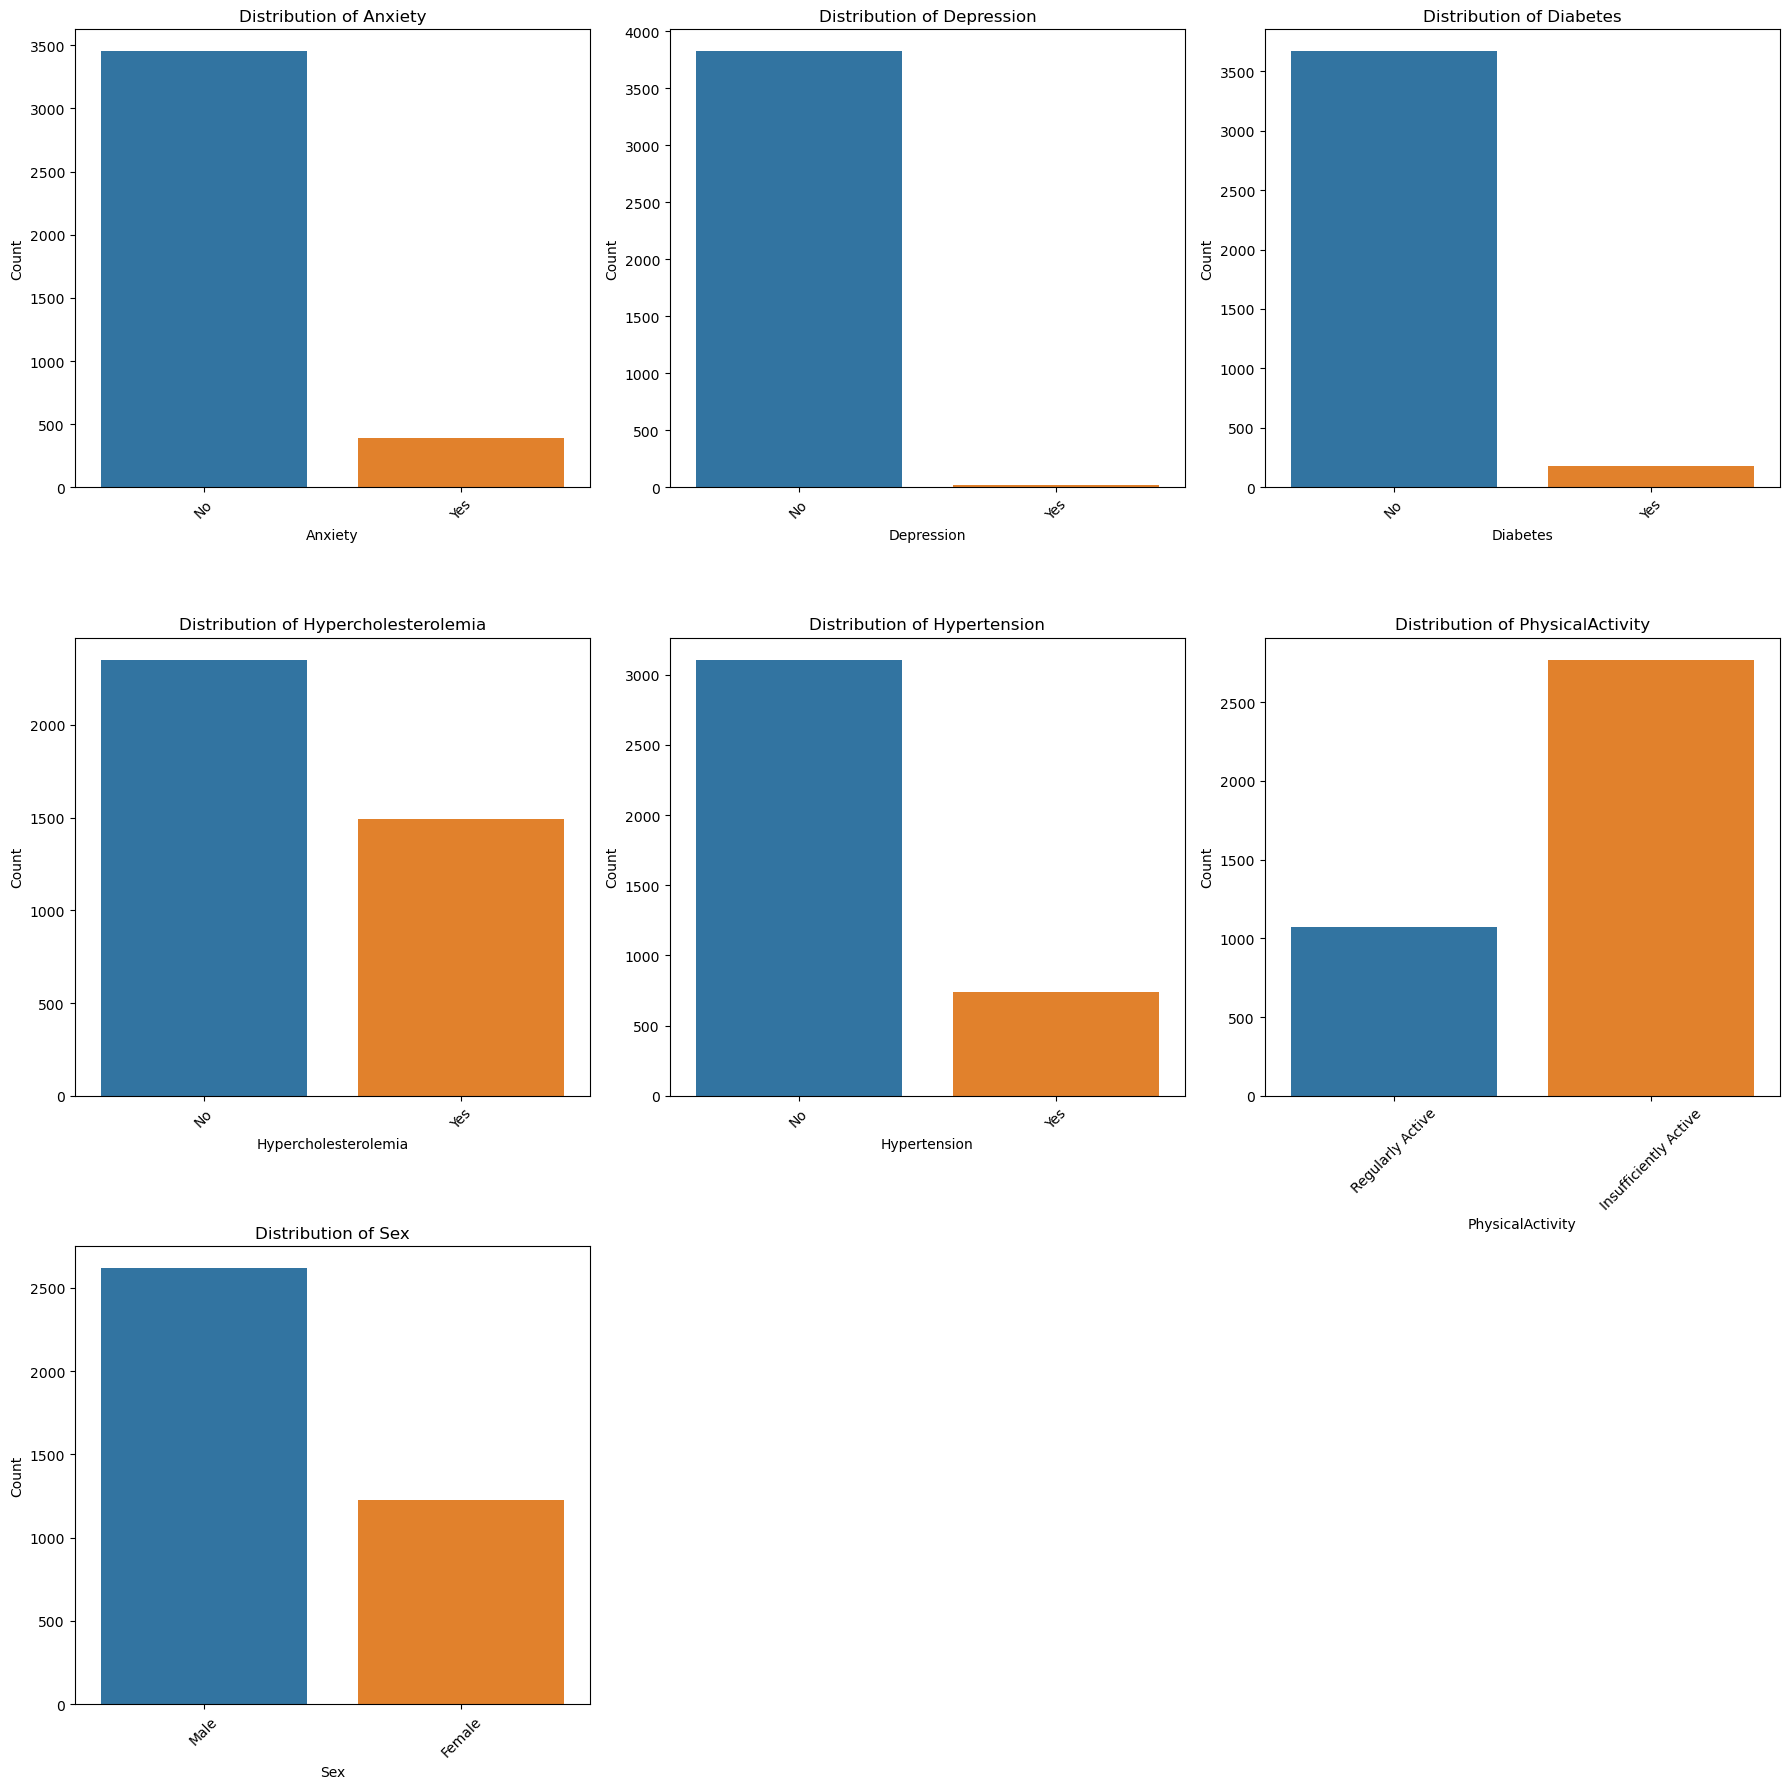

In [23]:
import math

# Assuming `multi_cols` is your list of columns
num_cols = len(binary_cols)
cols_per_row = 3  # Number of plots per row
num_rows = math.ceil(num_cols / cols_per_row)  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(18, 6 * num_rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes for easier indexing

for idx, col in enumerate(binary_cols):
    sns.countplot(x=col, hue=col, data=df_train, palette="tab10", ax=axes[idx], legend=False)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of columns is not a multiple of 3
for idx in range(num_cols, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()